In [1]:
import pandas as pd
import numpy as np
wine = pd.read_csv("winequality-red.csv",sep=";")
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1212c2d90>,
      dtype=object)

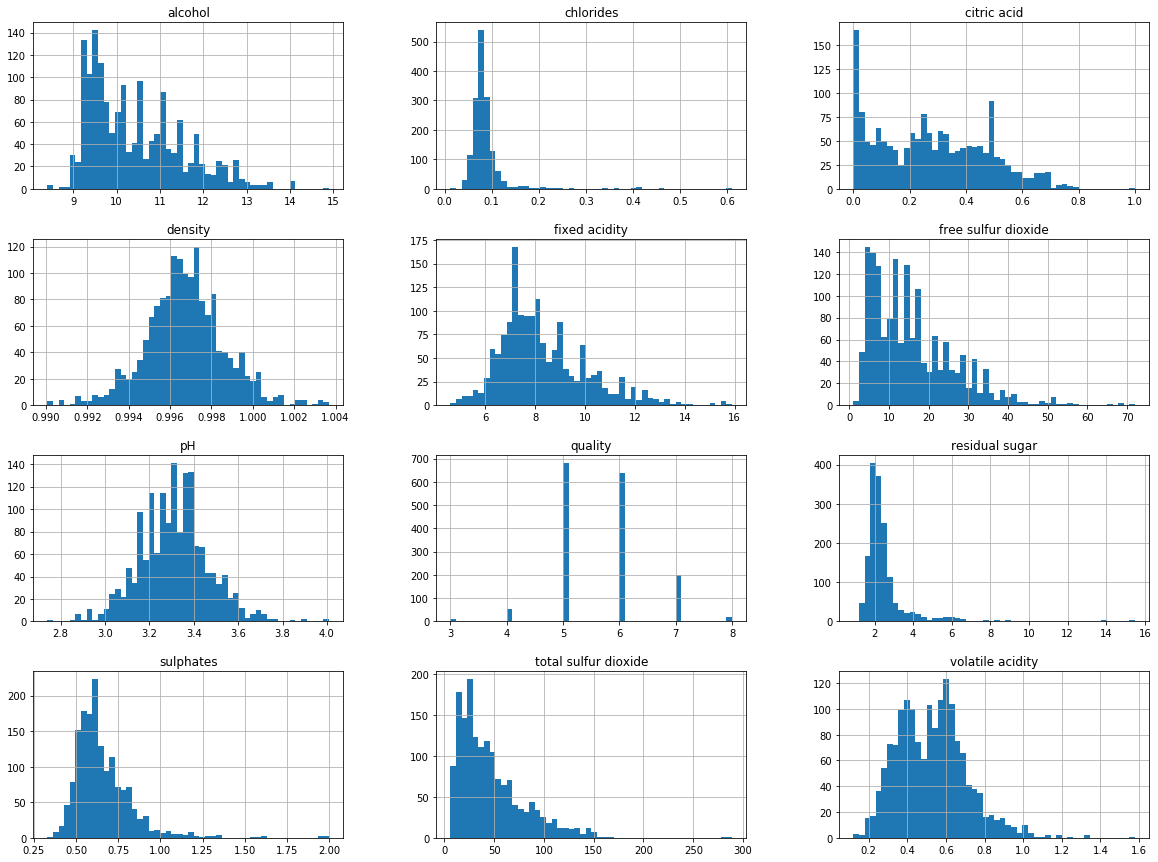

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))

In [5]:
corr_matrix = wine.corr()
corr_matrix["pH"].sort_values(ascending=False)

pH                      1.000000
volatile acidity        0.234937
alcohol                 0.205633
free sulfur dioxide     0.070377
quality                -0.057731
total sulfur dioxide   -0.066495
residual sugar         -0.085652
sulphates              -0.196648
chlorides              -0.265026
density                -0.341699
citric acid            -0.541904
fixed acidity          -0.682978
Name: pH, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
wine_std = pd.DataFrame(scaler.fit_transform(wine), columns=wine.columns)
wine_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [8]:
wine_std.duplicated().value_counts()

False    1359
True      240
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25f1f410>,
      dtype=object)

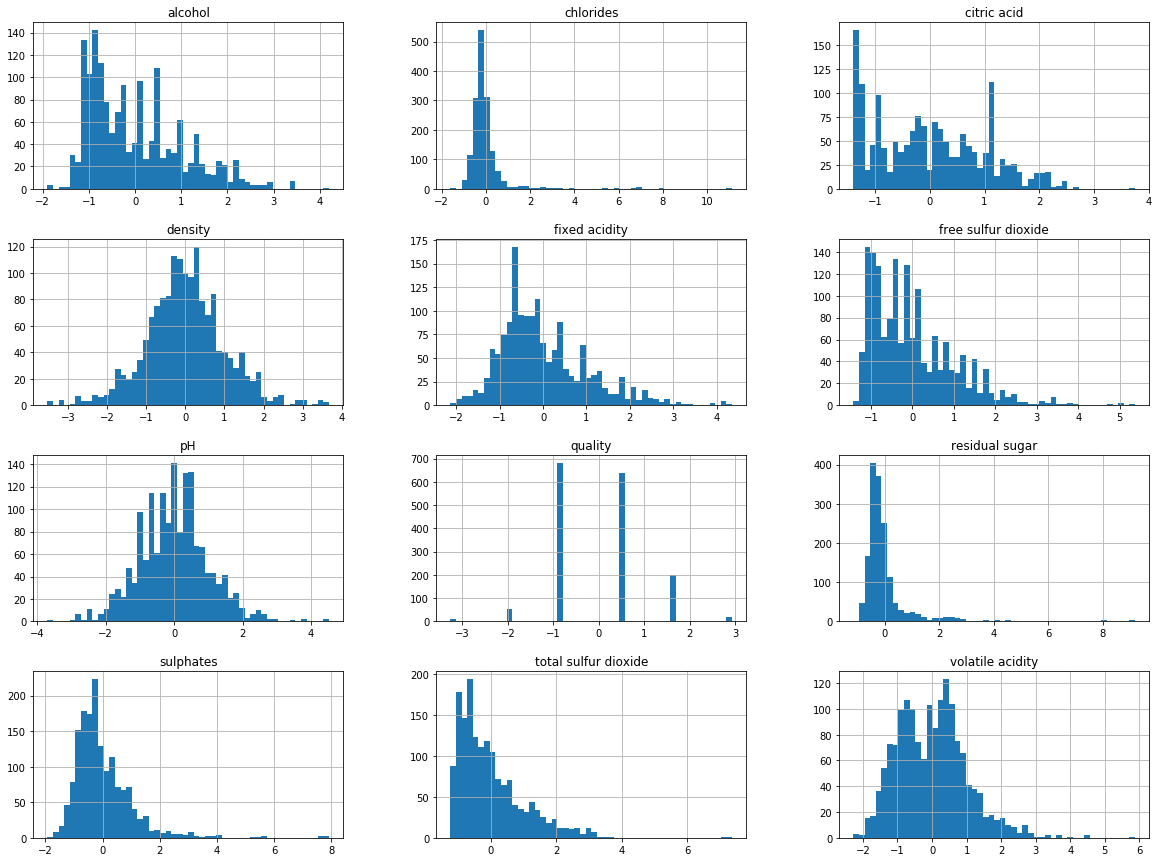

In [9]:
wine_std.hist(bins=50, figsize=(20,15))

In [10]:
wine_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,2.336509e-14,3.002879e-15,7.639596e-16,9.437243e-16,-8.051373e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


In [11]:
def split_train_test(data, test_ratio):
    np.random.seed(0)
    shuffled_index = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_index = shuffled_index[:test_size]
    train_index = shuffled_index[test_size:]
    return data.iloc[train_index], data.iloc[test_index]

In [12]:
train_set, test_set = split_train_test(wine_std, 0.2)
print("train size: ",len(train_set)," test size: ",len(test_set))

train size:  1280  test size:  319


In [13]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1023,-0.068735,-1.160984,0.765247,-0.169427,0.223875,-1.231239,-1.139357,-0.893963,-0.266384,-0.638220,1.761904,0.450848
642,0.907967,0.068040,0.919299,-0.169427,-0.349975,0.011961,-0.196679,1.247292,0.511130,-0.225128,-0.960246,-0.787823
679,1.425044,-1.496173,0.919299,0.540051,-0.583766,0.394484,0.077002,0.240266,-1.173483,-0.697233,-0.772512,-0.787823
473,0.907967,-0.993390,1.432803,-0.311323,-0.541259,-1.039977,-0.987312,0.187265,-0.331177,0.778094,0.166161,-0.787823
390,-1.562514,1.799848,-1.134720,-0.807957,-0.902572,-0.370562,1.262952,-2.303799,1.612607,0.955133,2.325108,2.928190
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.563248,0.710485,-0.056360,-0.382271,0.181368,-1.039977,-0.348724,0.335669,-0.395969,-1.405390,-0.772512,-0.787823
835,-0.413454,0.766350,-0.877968,-0.737010,-0.456244,1.063900,0.259456,-0.104243,0.511130,-0.874272,-1.054113,-0.787823
1216,-0.241094,0.235635,0.200392,-0.382271,-0.179946,-0.561823,0.989271,0.012360,-0.136798,0.187963,-0.866379,0.450848
559,2.689011,-0.323013,1.124700,1.249529,-0.052423,-0.944346,0.016184,2.837333,-0.072005,0.128950,2.137373,0.450848


In [14]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array

In [15]:
class MyLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, lam = 2.7):
        self.lam = lam
        self.w_ = None
        
    def fit(self, X, y):
        
        X, y = check_X_y(X, y, y_numeric=True)
        if self.lam != 0:
            pass
        else:
            pass
        
        XX = np.c_[np.ones(X.shape[0]),X]
        I = np.eye(XX.shape[1])
        A = XX.T@XX + self.lam * I
        b = XX.T@y
        self.w_ = np.dot(np.linalg.inv(A),b)
        
        return self
    
    def predict(self, X):
        X = np.array(X)
        XX = np.c_[np.ones(X.shape[0]),X]
        y = np.dot(XX,self.w_)
        
        check_is_fitted(self, "w_") # 学習済みかチェックする(推奨)
        XX = check_array(XX)
        return y

In [16]:
X_train = train_set.drop(columns="alcohol")
T_train = train_set["alcohol"]
X_test = test_set.drop(columns="alcohol")
T_test = test_set["alcohol"]

In [17]:
clf = MyLinearRegression()
clf.fit(X_train,T_train)
print("係数: ",clf.w_)
#print(type(X_train))

係数:  [-0.01334579  0.77563537  0.10853782  0.15234285  0.33574165 -0.03835929
 -0.04144522 -0.03583632 -1.00316433  0.51031579  0.15828291  0.17335139]


In [18]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(MyLinearRegression)

AssertionError: Estimator MyLinearRegression should not set any attribute apart from parameters during init. Found attributes ['w_'].

In [19]:
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

# Grid search
parameters = {'lam':np.exp([i for i in range(-10,10)])}
reg = GridSearchCV(MyLinearRegression(),parameters,cv=5)
reg.fit(X_train,T_train)
best = reg.best_estimator_

# 決定係数
print("決定係数: ", best.score(X_train, T_train)) # BaseEstimatorを継承しているため使える
# lambda
print("lam: ", best.lam)


決定係数:  0.6807286397954604
lam:  2.718281828459045


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
scores = cross_val_score(clf, X_train, T_train, cv=5)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.68516459 0.68041764 0.70686898 0.65419654 0.60583455]
Average score: 0.6664964592873347
